# List Full Names of all the participants in your team below:
1. Vibhav Yawalkar
2. Yiming Zhang
3. Nicholas Anzalone
4. Gowtham Rajasekaran
5. Shuoling Li
6. Mohan Vellayan
7. Xianxin Lin
8. Xingyu Chen
9. Faizaan Arshad
10. 
11. 


Hello Machine Learning Engineer Ganden Team, 

You have been given a data which is obtained from **Forest Fires** in California. 

Number of Instances: 517 <br>
Number of Attributes: 11 (including the target variable `y`)

Attribute Information: 
  * **y** area - the burned area of the forest in Calfornia(in ha): 0.00 to 1090.84
  * **f1** X - x-axis spatial coordinate within the California State Park: 1 to 9
  * **f2** Y - y-axis spatial coordinate within the California State Park: 2 to 9
  * **f3** FFMC - FFMC index from the FWI system: 18.7 to 96.20
  * **f4** DMC - DMC index from the FWI system: 1.1 to 291.3
  * **f5** DC - DC index from the FWI system: 7.9 to 860.6
  * **f6** ISI - ISI index from the FWI system: 0.0 to 56.10
  * **f7** temp - temperature in Celsius degrees: 2.2 to 33.30
  * **f8** RH - relative humidity in %: 15.0 to 100
  * **f9** wind - wind speed in km/h: 0.40 to 9.40
  * **f10** rain - outside rain in mm/m2 : 0.0 to 6.4

There are no missing Attribute Values.

Your task is to implement a **Linear Regression model using Gradient Descent Solution** to predict the area burned during the Forest Fires in California.

## Gradient Descent Solution
The **genesis equation** for Linear Regression is of the form:

$y(x,w) = W.x + b$  

* $y(x,w)$ is predicted output,
* $x$ is the Input
* $W = [W_{1}, W_{2}, .. , W_{F}]$ are the parameters to be learned from training samples with $F$ Features
* $b$ is the bias



YOU NEED TO IMPLEMENT an iterative solution to solve for $W$ (Gradient Descent Solution) 

<font color="red">DO NOT USE SKLEARNS LINEAR REGRESSION LIBRARY DIRECTLY.</font>

### **Question:** In the following code cell implement the following:
* Step 1: Import the dataset (forestfires.csv) using Pandas Dataframe (Step 1 Implemented already)
* Step 2: Partition your dataset into training testing and validation using sklearns train_test_split library and split the features and target labels into seperate variables (Step 2 Implemented already)
* Step 3: Scale the features using sklearns min max scaling function (Step 3 Implemented already)
* Step 4: Convert Scaled Features and Labels into numpy arrays with dimensions required by closed form solution (Step 4 Implemented already)
* Step 5: Initialize the learning rate, number of epochs, weight vector, bias scalar and other variables required for tracking cost.
* Step 6: Train with Training Dataset using Gradient Descent Solution
  Iteratively update the weights and biases for each epoch using:
  * Step 6.1: Use genesis equation $\hat{y} = W^{T}.X + b$ where $W$ is the weight array, $X$ is the input features and $\hat{y}$ is the predicted value. (You will have to perform same operation on validation set as well)
  * Step 6.2: Find Mean Squared Error (MSE) Loss Function (L) for training and validation set using predicted value $\hat{y}$ and truth value $y$
    * MSE Train Cost = $\frac{1}{n} \sum_{i=1}^{i=n} (y\_train_{i} - \hat{y}\_train_{i})^{2}$
  * Step 6.3: Find $ \Delta W_{j} = \frac{\delta L}{\delta W_{j}}$ and $ \Delta b = \frac{\delta L}{\delta b}$ where $j = 1$ to $F$(Proof for finding  $\Delta W$ and $\Delta b$ is available in the appendix below)
    * $ \Delta W_{j} = \frac{\delta L}{\delta W_{j}} = \frac{2}{n}\sum_{i=1}^{i=n}(y\_train_{i} - \hat{y}\_train_{i})*x_{ij}$
    * $ \Delta b = \frac{\delta L}{\delta b} = \frac{2}{n}\sum_{i=1}^{i=n}(y\_train_{i} - \hat{y}\_train_{i})$
  * Step 6.4: Update $W$ and $b$ using learning rate($\eta$) as follows:
    - $W_{j} = W_{j} - \eta*\Delta W_{j}$
    - $b = b - \eta*\Delta b$
  * Step 6.5: Store MSE Cost for training and validation in cost tracking lists
* Step 7: Plot validation and training cost vs number of epochs (Already Implemented)
* Step 8: Test using Testing Dataset
  * Step 8.1: Use genesis equation $\hat{y} = W^{T}.X_{test} + b$ where $W$ is the weight array, $X_{test}$ is the input test features and $\hat{y}$ is the predicted value.
  * Step 8.2: Calculate Mean Squared Error (MSE) for Test Dataset
    * MSE Test Cost$ = \frac{1}{n}\sum_{i=1}^{i=n} (y\_test_{i} - \hat{y}\_test_{i})^{2}$ 

## TA Response

In [1]:
# Step 1 already implemented
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/Mihir2/BreakoutSessionDataset/master/AirQualitySeattle.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))
data

# Step 2 already implemented
import numpy as np
from sklearn.model_selection import train_test_split
output = data['y']
input = data.to_numpy()[:,1:]
x_train, x_val_test, y_train, y_val_test = train_test_split(input, output, test_size = 0.8)
x_val, x_test, y_val, y_test = train_test_split(input, output, test_size = 0.5)

# Step 3 already implemented
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_xtrain = scaler.fit_transform(x_train)
sc_xval = scaler.fit_transform(x_val)
sc_xtest = scaler.transform(x_test)

# Step 4 already implemented
y_train_arr = y_train.to_numpy().reshape(y_train.shape[0],1).T
x_train_arr = sc_xtrain.T
y_val_arr = y_val.to_numpy().reshape(y_val.shape[0],1).T
x_val_arr = sc_xval.T
y_test_arr  = y_test.to_numpy().reshape(y_test.shape[0],1).T
x_test_arr  = sc_xtest.T

# Step 5 already implemented
learningrate = 0.005
epochs = 1000
bias = 0

number_of_features         = x_train_arr.shape[0]
number_of_train_datapoints = x_train_arr.shape[1]
number_of_val_datapoints   = x_val_arr.shape[1]
number_of_test_datapoints  = x_test_arr.shape[1]

weights = np.random.randn(number_of_features,1)

training_cost_track = []
val_cost_track = []

# Step 6
for epoch in range(epochs):
    
    # Step 6.1 y_pred = wT.X + b (For Training and Validation dataset)
    train_pred = np.dot(weights.T, x_train_arr) + bias
    val_pred   = np.dot(weights.T, x_val_arr)   + bias
    
    # Step 6.2 MSE Cost for Training and Validation Dataset
    train_cost = np.sum((train_pred - y_train_arr)**2)/number_of_train_datapoints
    val_cost   = np.sum((val_pred - y_val_arr)**2)/number_of_val_datapoints
    
    # Step 6.3: Calculate derivatives
    dz = train_pred - y_train_arr
    dw = (1/number_of_train_datapoints) * np.dot(x_train_arr, dz.T)
    db = (1/number_of_train_datapoints) * np.sum(dz)
    
    # Step 6.4: update weights and bias
    weights = weights - learningrate * dw
    bias = bias - learningrate * db

    # Step 6.5: Store MSE Cost for training and validation in seperate cost tracking list
    training_cost_track.append(train_cost)
    val_cost_track.append(val_cost)

In [2]:
# Step 8.1: Test using Testing Dataset: Get the predicted values 
test_pred = np.dot(weights.T, x_test_arr) + bias

# Step 8.2: Calculate the MSE for Testing dataset
test_cost = np.sum((test_pred - y_test_arr)**2)/number_of_test_datapoints

## Student Response

In [ ]:
# Step 1 already implemented
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/Mihir2/BreakoutSessionDataset/master/forestfires.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))
data

# Step 2 already implemented
import numpy as np
from sklearn.model_selection import train_test_split
output = data['y']
input = data.to_numpy()[:,1:]
x_train, x_val_test, y_train, y_val_test = train_test_split(input, output, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size = 0.5)

# Step 3 already implemented
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_xtrain = scaler.fit_transform(x_train)
sc_xval = scaler.fit_transform(x_val)
sc_xtest = scaler.transform(x_test)

# Step 4 already implemented
y_train_arr = y_train.to_numpy().reshape(y_train.shape[0],1).T
x_train_arr = sc_xtrain.T
y_val_arr = y_val.to_numpy().reshape(y_val.shape[0],1).T
x_val_arr = sc_xval.T
y_test_arr  = y_test.to_numpy().reshape(y_test.shape[0],1).T
x_test_arr  = sc_xtest.T

# Step 5 already implemented
learningrate = 0.005
epochs = 1000
bias = 0

number_of_features         = x_train_arr.shape[0]
number_of_train_datapoints = x_train_arr.shape[1]
number_of_val_datapoints   = x_val_arr.shape[1]
number_of_test_datapoints  = x_test_arr.shape[1]

weights = np.random.randn(number_of_features,1)

training_cost_track = []
val_cost_track = []

# Step 6
for epoch in range(epochs):
    
    # Step 6.1 y_pred = wT.X + b (For Training and Validation dataset)
    y_pred = np.dot((weights.T),x_train_arr)+bias 
    y_pred_val = np.dot((weights.T),x_val_arr)+bias
    # Step 6.2 MSE Cost for Training and Validation Dataset
    MSE_train_cost =  np.sum((y_pred-y_train_arr)**2)/number_of_train_datapoints
    MSE_train_cost_val =  np.sum((y_pred_val-y_val_arr)**2)/number_of_val_datapoints

    # Step 6.3
    delta_w = -2/number_of_train_datapoints*np.dot((y_pred-y_train_arr),x_train_arr.T)
    delta_b = -2/number_of_train_datapoints*np.sum(y_pred-y_train_arr)

    # Step 6.4: update weights and bias
    weights = weights - learningrate* delta_w
    bias = bias - learningrate* delta_b

    # Step 6.5: Store MSE Cost for training and validation in seperate cost tracking list
    
    training_cost_track.append(MSE_train_cost)
    val_cost_track.append(MSE_train_cost_val)

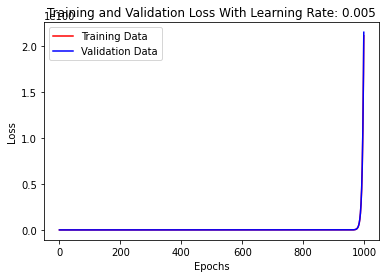

In [ ]:
# Step 7: Plot MSE cost for training and validation set vs number of epochs (Already Implemented)
import matplotlib.pyplot as plt
plt.title('Training and Validation Loss With Learning Rate: ' + str(learningrate))
plt.plot(training_cost_track, color='red', label='Training Data')
plt.plot(val_cost_track, color='blue', label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 8.1: Test using Testing Dataset: Get the predicted values 
y_pred_test = np.dot((weights.T),x_test_arr)+bias 
    
# Step 8.2: Calculate the MSE for Testing dataset
MSE_test_cost =  np.sum((y_pred_test-y_test_arr)**2)/number_of_test_datapoints

### Appendix (Proof)

![!picture](https://drive.google.com/uc?export=view&id=1MVcYLfEzAlKcumhLiwrsmGSn0-AAK3tg)